Generating: 100.0%
Done.
test


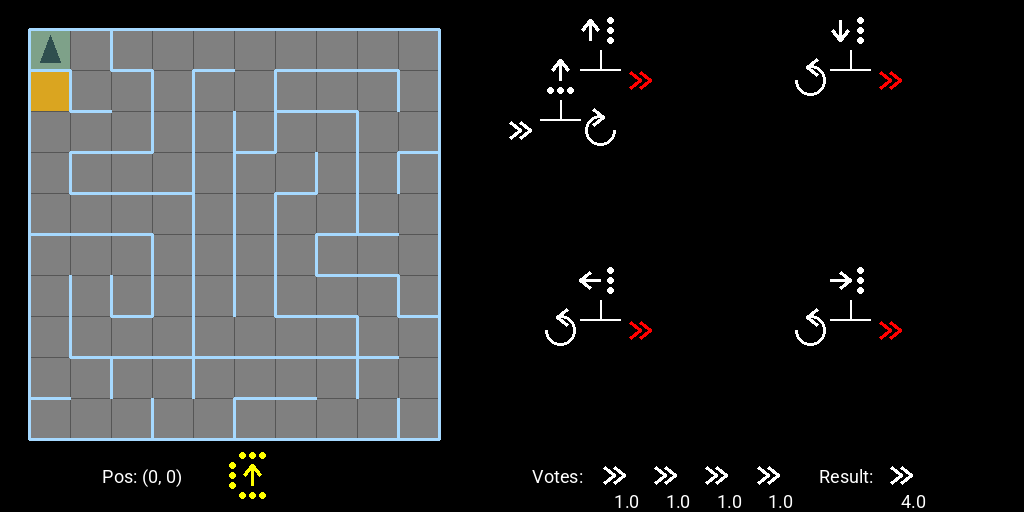

In [47]:
import math
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display,clear_output
import IPython.display
import random

class cell:
    def __init__(self,mazesize,GridPos,padding=40,cellsize=30,top=True,left=True,right=True,bottom=True,celltype="regular"):
        self.cellsize = cellsize
        self.celltype = celltype
        self.grid_directions = {(0,-1):"top",(0,1):"bottom",(-1,0):"left",(1,0):"right"}
        self.directions = {"top":top,"bottom":bottom,"left":left,"right":right}
        self.mazesize = mazesize
        self.GridPos = GridPos
        self.rect = ((GridPos[0]*cellsize-cellsize/2,GridPos[1]*cellsize-cellsize/2),(GridPos[0]*cellsize+cellsize/2,GridPos[1]*cellsize+cellsize/2))
        self.rect = ((int(self.rect[0][0]+padding),int(self.rect[0][1]+padding)),(int(self.rect[1][0]+padding),int(self.rect[1][1]+padding)))
        self.visited = 0

    def GetNeighbours(self):
        Neighbours = []
        if self.GridPos[0]-1 > -1:
            Neighbours.append( (self.GridPos[0]-1,self.GridPos[1]) )
        if self.GridPos[0]+1 < self.mazesize:
            Neighbours.append( (self.GridPos[0]+1,self.GridPos[1]) )
        if self.GridPos[1]-1 > -1:
            Neighbours.append( (self.GridPos[0],self.GridPos[1]-1) )
        if self.GridPos[1]+1 < self.mazesize:
            Neighbours.append( (self.GridPos[0],self.GridPos[1]+1) )

        #print(self.GridPos," ",Neighbours)
        return Neighbours

    def ClearPassageWith(self,neighbourcell):
        oposite_direction = {"top":"bottom","bottom":"top","left":"right","right":"left"}
        d_str = self.grid_directions [(neighbourcell.GridPos[0]-self.GridPos[0],neighbourcell.GridPos[1]-self.GridPos[1])]
        #print(d_str)
        self.directions[d_str] = False
        neighbourcell.directions[oposite_direction[d_str]]= False
        
    def CheckPassageWith(self,neighbourcell):
        grid_dir = (neighbourcell.GridPos[0]-self.GridPos[0],neighbourcell.GridPos[1]-self.GridPos[1])
        passage_blocked = self.directions[self.grid_directions[grid_dir]]
        return passage_blocked

class maze:
    def __init__(self,mazesize = 10,imagesize = 40,padding=50,start_pos=(0,0)):
        self.mazesize = mazesize
        self.padding = padding
        self.imagesize = imagesize
        self.cellsize = ((imagesize[0]/2)/mazesize)*0.8
        self.mouse_pos = (0,0)
        self.mouse_dir = 0
        self.mazecells = []
        self.breadcrumbs = []
        self.start_pos = start_pos
        self.end_pos = (mazesize-1,mazesize-1)
        self.end_cell = None
        self.start_cell = None
        for i in range(self.mazesize):
            self.mazecells.append([])
            for j in range(self.mazesize):
                self.mazecells[i].append(cell(self.mazesize,(i,j),cellsize=self.cellsize,padding=self.padding)) 
        #self.mazecells[3][3].directions = {"top":True,"bottom":True,"left":True,"right":True}
        self.set_endcell(self.end_pos)
        self.set_startcell(self.start_pos)

    def draw_mouse(self,draw_obj):
        #self.mouse_pos
        #self.mouse_dir 
        mic_c = ((self.mouse_pos[0]*self.cellsize)-(self.cellsize/2)+self.padding,(self.mouse_pos[1]*self.cellsize)-(self.cellsize/2)+self.padding)
        mic_c = (mic_c[0]+self.cellsize/2,mic_c[1]+self.cellsize/2)
        polygon_coords = None 
        
        if self.mouse_dir == 0:
            polygon_coords   = [(mic_c[0]-10,mic_c[1]+12),(mic_c[0]+10,mic_c[1]+12),(mic_c[0],mic_c[1]-15)]
        elif self.mouse_dir == 1:
            polygon_coords   = [(mic_c[0]-10,mic_c[1]-12),(mic_c[0]+10,mic_c[1]-12),(mic_c[0],mic_c[1]+15)]
        elif self.mouse_dir == 2:
            polygon_coords   = [(mic_c[0]-15,mic_c[1]),(mic_c[0]+12,mic_c[1]-10),(mic_c[0]+12,mic_c[1]+10)]
        elif self.mouse_dir == 3:
            polygon_coords   = [(mic_c[0]+15,mic_c[1]),(mic_c[0]-12,mic_c[1]-10),(mic_c[0]-12,mic_c[1]+10)]
        #polygon_coords_right =
        draw_obj.polygon( polygon_coords, fill ="darkslategray") 

    def get_mouse_inputs(self):
        mx = self.mouse_pos[0]
        my = self.mouse_pos[1]
        walls = self.mazecells[mx][my].directions
        inputs = walls
        inputs["mouse_dir"] = self.mouse_dir
        return inputs
        
    def draw(self,draw_obj):
        wallcolor = (166, 217, 255)
        celloutline = (86, 86, 86 )
        for row in self.mazecells:
            for cell in row:
                if cell.celltype == "regular":
                    draw_obj.rectangle(cell.rect, fill="gray",outline=celloutline)
                elif cell.celltype == "end":
                    draw_obj.rectangle(cell.rect, fill="Goldenrod",outline=celloutline)
                elif cell.celltype == "start": 
                    draw_obj.rectangle(cell.rect, fill=(126, 161, 137),outline=celloutline)
        for row in self.mazecells:
            for cell in row:
                if cell.directions['top']:
                    draw_obj.line((cell.rect[0],(cell.rect[1][0],cell.rect[0][1])), fill=wallcolor, width=3)
                if cell.directions['bottom']:
                    draw_obj.line(((cell.rect[0][0],cell.rect[1][1]),cell.rect[1]), fill=wallcolor, width=3)
                if cell.directions['left']:
                    draw_obj.line((cell.rect[0],(cell.rect[0][0],cell.rect[1][1])), fill=wallcolor, width=3)
                if cell.directions['right']:
                    draw_obj.line(((cell.rect[1][0],cell.rect[0][1]),cell.rect[1]), fill=wallcolor, width=3)
        #Maze stats
        self.draw_mouse(draw_obj)

    def printmaze(self):
        #clear_output(wait=True)
        img = Image.new("RGB", self.imagesize)
        drw = ImageDraw.Draw(img)
        self.draw(drw)
        img.save("img.png")
        pil_img = IPython.display.Image(filename="img.png")
        display(pil_img)

    def set_endcell(self,pos):
        if self.end_cell != None:
            self.end_cell.celltype = "regular"
        self.end_cell = self.mazecells[pos[0]][pos[1]]
        self.end_cell.celltype = "end"
        self.end_pos = pos
        
    def set_startcell(self,pos):
        if self.start_cell != None:
            self.start_cell.celltype = "regular"
        self.start_cell = self.mazecells[pos[0]][pos[1]]
        self.start_cell.celltype = "start"
        self.start_pos = pos
        
    def generate(self):
        moves = [(0,-1),(0,1),(-1,0),(1,0)]
        wall_at_dir = ["top","bottom","left","right"]
        wall_at_dir_inv = ["bottom","top","right","left"]
        visitcount = 0
        idr = 0
        agent_pos = [0,0]
        next_pos = [-1,-1]
        while visitcount < self.mazesize**2-1:
            #print("visitcount: "+str(visitcount)," agent_pos:"+str(agent_pos))
            currentcell = self.mazecells[agent_pos[0]][agent_pos[1]]
            neighbours_positions = currentcell.GetNeighbours()
            leastVisits = 9999
            leastVisitedNeighbours = []
            #print("neighbours: ")
            for npos in neighbours_positions:
                neighbours_cell = self.mazecells[npos[0]][npos[1]]
                #print(neighbours_cell.GridPos," ",neighbours_cell.visited)
                if neighbours_cell.visited < leastVisits:
                    leastVisits = neighbours_cell.visited
            #print("leastVisited: ")
            for npos in neighbours_positions:
                neighbours_cell = self.mazecells[npos[0]][npos[1]]
                if neighbours_cell.visited == leastVisits:
                    leastVisitedNeighbours.append(neighbours_cell)
                    #print(neighbours_cell.GridPos," ",neighbours_cell.visited)
            leastVisitedNeighbour = random.choice(leastVisitedNeighbours)
            next_pos = leastVisitedNeighbour.GridPos
            nextcell = leastVisitedNeighbour
            #print("next_pos: ",next_pos)
            #self.printmaze()
            if nextcell.visited == 0:
                currentcell.ClearPassageWith(nextcell)
                agent_pos = next_pos
                visitcount += 1
                clear_output(wait=True)
                print("Generating: " + str(100*(visitcount/(self.mazesize**2-1))) + "%")
            else:
                if not currentcell.CheckPassageWith(nextcell):
                    agent_pos = next_pos
                else:
                    nextcell.visited +=1
            currentcell.visited +=1
            self.mouse_pos = agent_pos
        print("Done.")
        self.set_endcell(self.mouse_pos) 
        self.mouse_pos = self.start_pos

class icons_class:
    def __init__(self):
        pass
        
    def getactivecolor(self,active,activecolor = "yellow"):
        return activecolor if active else "white"

    def draw_move_icon(self,pos,draw_obj,active=False,visible=True,activecolor="red"):
        iconcolor = self.getactivecolor(active,activecolor=activecolor)
        pos = (pos[0]+10,pos[1])
        draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
        draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
        draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
        pos = (pos[0]-10,pos[1])
        draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
        draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
        draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
        
    def draw_arc_arrow_icon(self,pos,draw_obj,active=False,visible=True,rot=0,activecolor="red"):
        iconcolor = self.getactivecolor(active,activecolor=activecolor)
        if visible:
            if rot == 1:
                draw_obj.arc([(pos[0]-15, pos[1]-15), (pos[0]+15, pos[1]+15)], start=0, end=270, fill=iconcolor, width=3)
                pos = (pos[0]+3,pos[1]-13)
                draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            elif rot == 0:
                draw_obj.arc([(pos[0]-15, pos[1]-15), (pos[0]+15, pos[1]+15)], start=-90, end=180, fill=iconcolor, width=3)
                pos = (pos[0]-3,pos[1]-13)
                draw_obj.line([pos,(pos[0]+10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            
    def draw_arrow_icon(self,pos,draw_obj,active=True,visible=True,mouse_dir=0):
        iconcolor = self.getactivecolor(active)
        
        if visible:
            if mouse_dir == 0: 
                draw_obj.line([pos,(pos[0],pos[1]+20)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-8,pos[1]+10)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+8,pos[1]+10)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            elif mouse_dir == 1:
                pos = (pos[0],pos[1]+20)
                draw_obj.line([pos,(pos[0],pos[1]-20)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-8,pos[1]-10)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+8,pos[1]-10)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)            
            elif mouse_dir == 2:
                pos = (pos[0]-10,pos[1]+10)
                draw_obj.line([pos,(pos[0]+20,pos[1])],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]+10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
            elif mouse_dir == 3:
                pos = (pos[0]+10,pos[1]+10)
                draw_obj.line([pos,(pos[0]-20,pos[1])],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-10,pos[1]-8)],fill=iconcolor, width=3)
                draw_obj.line([pos,(pos[0]-10,pos[1]+8)],fill=iconcolor, width=3)
                draw_obj.ellipse([(pos[0]-1,pos[1]-1),(pos[0]+1,pos[1]+1)],fill=iconcolor)
        
    def draw_dottedline(self,pos,draw_obj,active=False,vertical=True,visible=True):
        iconcolor = self.getactivecolor(active)
            
        if visible:
            draw_obj.ellipse([(pos[0]-3,pos[1]-3),(pos[0]+3,pos[1]+3)],fill=iconcolor)
    
            if vertical:
                draw_obj.ellipse([(pos[0]-3,pos[1]-3+10),(pos[0]+3,pos[1]+3+10)],fill=iconcolor)
                draw_obj.ellipse([(pos[0]-3,pos[1]-3+20),(pos[0]+3,pos[1]+3+20)],fill=iconcolor)
            else:
                draw_obj.ellipse([(pos[0]-3+10,pos[1]-3),(pos[0]+3+10,pos[1]+3)],fill=iconcolor)
                draw_obj.ellipse([(pos[0]-3+20,pos[1]-3),(pos[0]+3+20,pos[1]+3)],fill=iconcolor)
    
    def draw_action_icon(self,action,pos,draw_obj,visible=True,active = False,activecolor = "green"):
        if action == "rot_left":
            self.draw_arc_arrow_icon(pos,draw_obj,rot=0,visible=visible,active = active,activecolor=activecolor)
        elif action == "rot_right":
            self.draw_arc_arrow_icon(pos,draw_obj,rot=1,visible=visible,active = active,activecolor=activecolor)
        elif action == "move":
            self.draw_move_icon(pos,draw_obj,visible=visible,active = active,activecolor=activecolor)
            
class leaf:
    def __init__(self,question,leftanswer,rightanswer):
        self.question = question
        self.leftanswer = None
        self.rightanswer = None
        if isinstance(leftanswer, str):
            self.leftanswer = leftanswer
        else:
            self.leftanswer = leaf(leftanswer["question"],leftanswer["left"],leftanswer["right"])

        if isinstance(rightanswer, str):
            self.rightanswer = rightanswer
        else:
            self.rightanswer = leaf(rightanswer["question"],rightanswer["left"],rightanswer["right"])
        
    def get_decision(self,inpt):
        if inpt[self.question[0]] and (inpt["mouse_dir"] == self.question[1]):
            if isinstance(self.leftanswer, str):
                return(self.leftanswer)
            else:
                return(self.leftanswer.get_decision(inpt))
        else:
            if isinstance(self.rightanswer, str):
                return(self.rightanswer)
            else:
                return(self.rightanswer.get_decision(inpt))
                
    def draw_leaf(self,draw_obj,pos,inpt,upstream = True):
        bracketcolor = "white"
        icon = icons_class()
        right_pos = (pos[0]+40,pos[1]+50)
        left_pos = (pos[0]-40,pos[1]+50)
        
        act = inpt[self.question[0]] and (inpt["mouse_dir"] == self.question[1]) and upstream
        if self.question[0] == "top":
            icon.draw_arrow_icon((pos[0],pos[1]-10),draw_obj,mouse_dir = self.question[1],active=act)
            icon.draw_dottedline((pos[0]-10,pos[1]-20),draw_obj,active = act,vertical = False)
        elif self.question[0] == "bottom":
            icon.draw_arrow_icon((pos[0],pos[1]-20),draw_obj,mouse_dir = self.question[1],active=act)
            icon.draw_dottedline((pos[0]-10,pos[1]+10),draw_obj,active = act,vertical = False)
        elif self.question[0] == "left":
            icon.draw_arrow_icon((pos[0]+10,pos[1]-10),draw_obj,mouse_dir = self.question[1],active=act)
            icon.draw_dottedline((pos[0]-10,pos[1]-10),draw_obj,active = act)
        elif self.question[0] == "right":
            icon.draw_arrow_icon((pos[0]-10,pos[1]-10),draw_obj,mouse_dir = self.question[1],active=act)
            icon.draw_dottedline((pos[0]+10,pos[1]-10),draw_obj,active = act)
        
        if isinstance(self.leftanswer, str):
            if self.leftanswer == "rot_left":
                icon.draw_arc_arrow_icon(left_pos,draw_obj,rot=0,active = act,activecolor="green")
            if self.leftanswer == "rot_right":
                icon.draw_arc_arrow_icon(left_pos,draw_obj,rot=1,active = act,activecolor="green")
            if self.leftanswer == "move":
                icon.draw_move_icon(left_pos,draw_obj,active = act,activecolor="green")
            icon.draw_action_icon(self.leftanswer,right_pos,draw_obj,active = act,activecolor="red")
            
        elif isinstance(self.leftanswer, leaf):
            self.leftanswer.draw_leaf(draw_obj,left_pos,inpt,upstream = act)
        
        if isinstance(self.rightanswer, str):
            act = (not act) and upstream
            icon.draw_action_icon(self.rightanswer,right_pos,draw_obj,active = act,activecolor="red")
                
        elif isinstance(self.rightanswer, leaf):
            self.rightanswer.draw_leaf(draw_obj,right_pos,inpt,upstream = act)

        draw_obj.line([(pos[0],pos[1]+20),(pos[0],pos[1]+40)],fill=bracketcolor, width=2)
        draw_obj.line([(pos[0]+20,pos[1]+40),(pos[0]-20,pos[1]+40)],fill=bracketcolor, width=2)
    
class tree:
    def __init__(self,treedict):
        #self.depth = depth
        
        self.rootnode = leaf( treedict["question"],treedict["left"], treedict["right"])
        self.voting_power = 1.0

    def get_decision(self,mouse_input):
        return self.rootnode.get_decision(mouse_input)
    
    def draw_tree(self,draw_obj,pos,mouse_input):
        self.rootnode.draw_leaf(draw_obj,pos,mouse_input)
        
class board:
    def __init__(self,mazesize = 10,imagesize = (1024,512)):
        self.maze = maze(mazesize,imagesize)
        self.imagesize = imagesize
        self.trees = []
        self.trees.append(tree({"question":("right",0),"left":{"question":("bottom",0),"left":"move","right":"rot_right"},"right":"move"}))
        self.trees.append(tree({"question":("right",1),"left":"rot_left","right":"move"}))
        self.trees.append(tree({"question":("right",2),"left":"rot_left","right":"move"}))
        self.trees.append(tree({"question":("right",3),"left":"rot_left","right":"move"}))
        
    def draw_forest(self,draw_obj):
        self.trees[0].draw_tree(draw_obj,(600,30),self.maze.get_mouse_inputs())
        self.trees[1].draw_tree(draw_obj,(850,30),self.maze.get_mouse_inputs())
        self.trees[2].draw_tree(draw_obj,(600,280),self.maze.get_mouse_inputs())
        self.trees[3].draw_tree(draw_obj,(850,280),self.maze.get_mouse_inputs())
        
    def draw_vote_sum(self,draw_obj):
        font_ = ImageFont.truetype("Roboto.ttf", 18)
        icon = icons_class()
        votesum_height = self.imagesize[1]*0.91
        draw_obj.text((self.imagesize[0]*0.52, votesum_height), "Votes: ", fill="white", font=font_)
        result_dict = {}
        decisions = []
        
        
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            decisions.append(tree_decision)
            icon.draw_action_icon(tree_decision,(self.imagesize[0]*(0.6+i*0.05), votesum_height+10),draw_obj) 
            draw_obj.text((self.imagesize[0]*(0.6+i*0.05), votesum_height+25), str(t.voting_power), fill="white", font=font_)
            result_dict[tree_decision] = 0
            
        draw_obj.text((self.imagesize[0]*0.8, votesum_height), "Result: ", fill="white", font=font_)
        for i,t in enumerate(self.trees):
            tree_decision = t.get_decision(self.maze.get_mouse_inputs())
            result_dict[tree_decision] += t.voting_power

        print("test")
        voted_decision = max(result_dict, key=result_dict.get)
        icon.draw_action_icon(voted_decision,(self.imagesize[0]*0.88, votesum_height+10),draw_obj) 
        draw_obj.text((self.imagesize[0]*0.88, votesum_height+25), str(result_dict[voted_decision]) , fill="white", font=font_)
        
        
    def draw_mazestats(self,draw_obj):
        inputs = self.maze.get_mouse_inputs()
        icon = icons_class()
        stats_height = self.imagesize[1]*0.91
        
        icon.draw_arrow_icon((self.imagesize[0]*0.1+150,stats_height),draw_obj,mouse_dir = inputs["mouse_dir"])
        
        draw_obj.text((self.imagesize[0]*0.1, stats_height), "Pos: "+str(self.maze.mouse_pos), fill="white", font=ImageFont.truetype("Roboto.ttf", 18))
        
        icon.draw_dottedline((self.imagesize[0]*0.1+130,stats_height),draw_obj,visible = inputs["left"],active=True)
        icon.draw_dottedline((self.imagesize[0]*0.1+170,stats_height),draw_obj,visible = inputs["right"],active=True)
        icon.draw_dottedline((self.imagesize[0]*0.1+140,stats_height-10),draw_obj,vertical = False,visible = inputs["top"],active=True)
        icon.draw_dottedline((self.imagesize[0]*0.1+140,stats_height + 30),draw_obj,vertical = False,visible = inputs["bottom"],active=True)
        
    def generate_maze(self):
        self.maze.generate()
        
    def draw_board(self):
        img = Image.new("RGB", self.imagesize)
        drw = ImageDraw.Draw(img)
        self.maze.draw(drw)
        self.draw_forest(drw)
        self.draw_mazestats(drw)
        self.draw_vote_sum(drw)

        
        img.save("img.png")
        pil_img = IPython.display.Image(filename="img.png")
        display(pil_img)
        

        
b = board()

b.generate_maze()
b.draw_board()
#darkslategray